In [1]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os, time
import fitsio
import healpy as hp
from sklearn import cluster
sys.path.append('/Users/roz18/git/pixel_partition')
import pixel_partition_greedy

__Initial grouping results__

In [3]:
t = Table.read('/Users/roz18/git/desi-photoz/dr7/clustering/jackknife_partition/results/clustering_results_20181119.txt', format='ascii.commented_header')

hp_ra = np.array(t['ra'])
hp_dec = np.array(t['dec'])
density = np.array(t['density'])
counts = np.array(t['count'])
labels = np.array(t['label_scrambled'])

ngroup = len(np.unique(labels))
print(ngroup)

120


In [4]:
w_counts_init = np.zeros(ngroup)
for index in range(ngroup):
    w_counts_init[index] = np.sum(counts[labels==index])

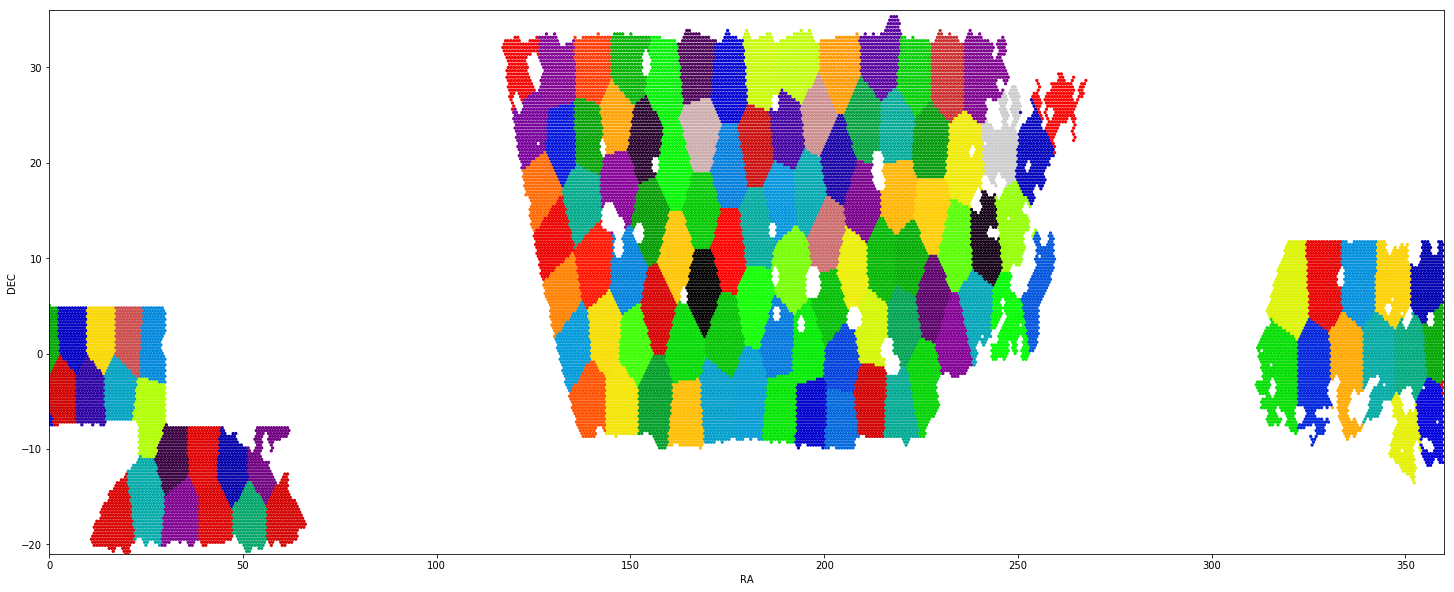

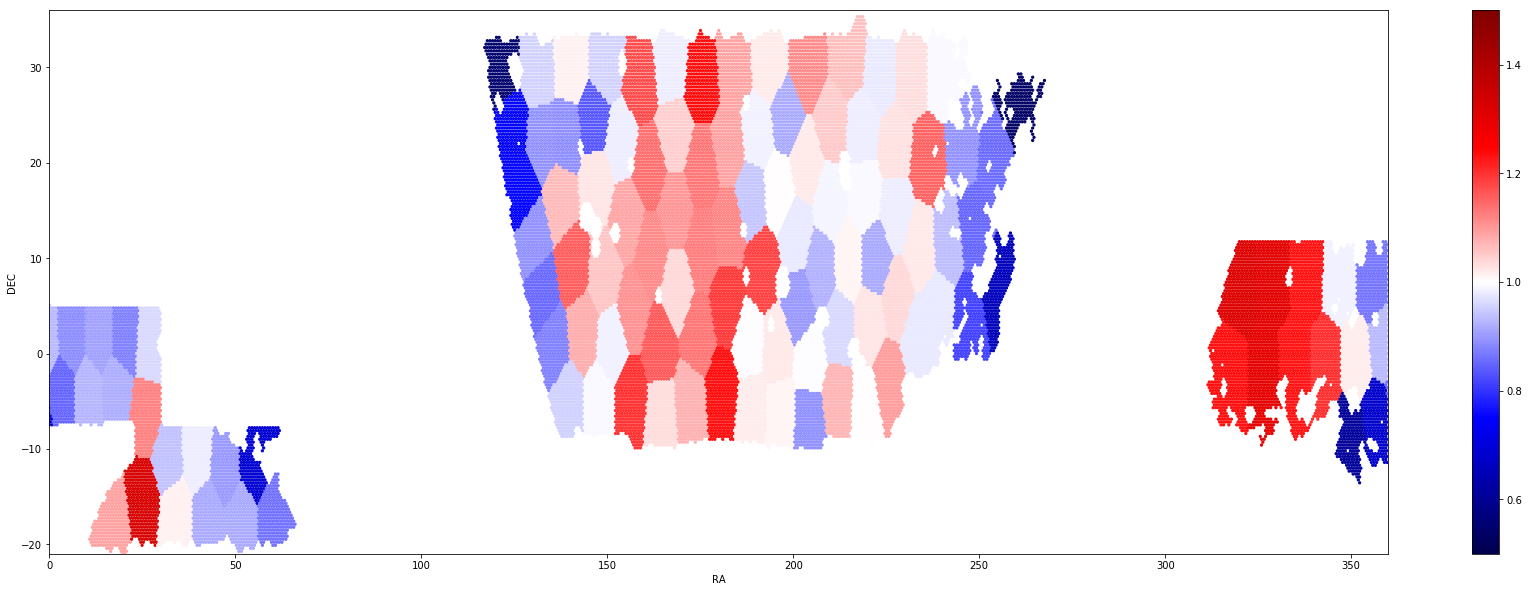

In [5]:
# Final grouping
plt.figure(figsize=(25, 10))
plt.scatter(hp_ra, hp_dec, c=labels, cmap='nipy_spectral', s=5)
plt.axis([0, 360, -21, 36])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

counts_pix = w_counts_init[labels]
plt.figure(figsize=(30, 10))
plt.scatter(hp_ra, hp_dec, c=counts_pix/np.mean(w_counts_init),
            cmap='seismic', s=5, vmin=0.5, vmax=1.5)
plt.colorbar()
plt.axis([0, 360, -21, 36])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

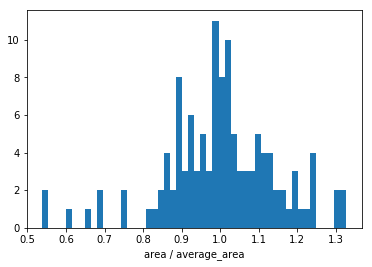

In [6]:
plt.hist(w_counts_init/np.mean(w_counts_init), 50)
plt.xlabel('area / average_area')
plt.show()

__Final grouping__

In [7]:
t = Table.read('/Users/roz18/git/desi-photoz/dr7/clustering/jackknife_partition/results/jackknife_subsample_hp_greedy_20181119.txt', format='ascii.commented_header')

hp_ra = np.array(t['ra'])
hp_dec = np.array(t['dec'])
density = np.array(t['density'])
counts = np.array(t['count'])
labels = np.array(t['label'])

ngroup = len(np.unique(labels))
print(ngroup)

120


In [8]:
w_counts = np.zeros(ngroup)
for index in range(ngroup):
    w_counts[index] = np.sum(counts[labels==index])

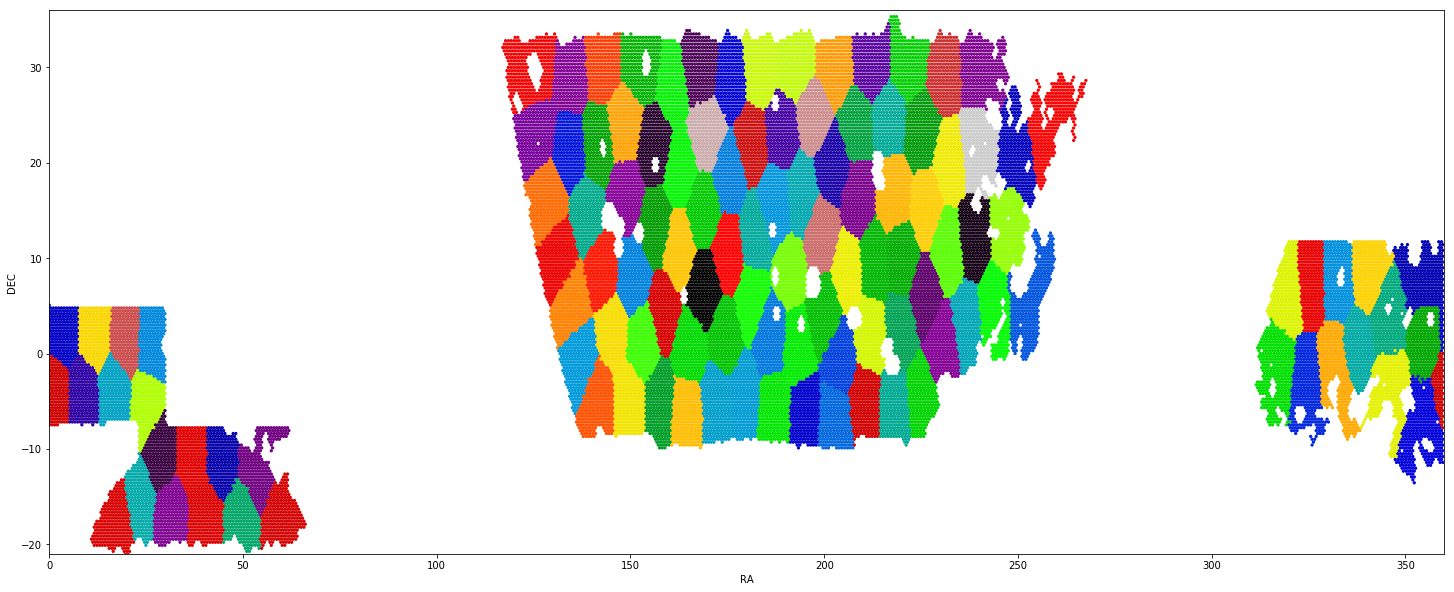

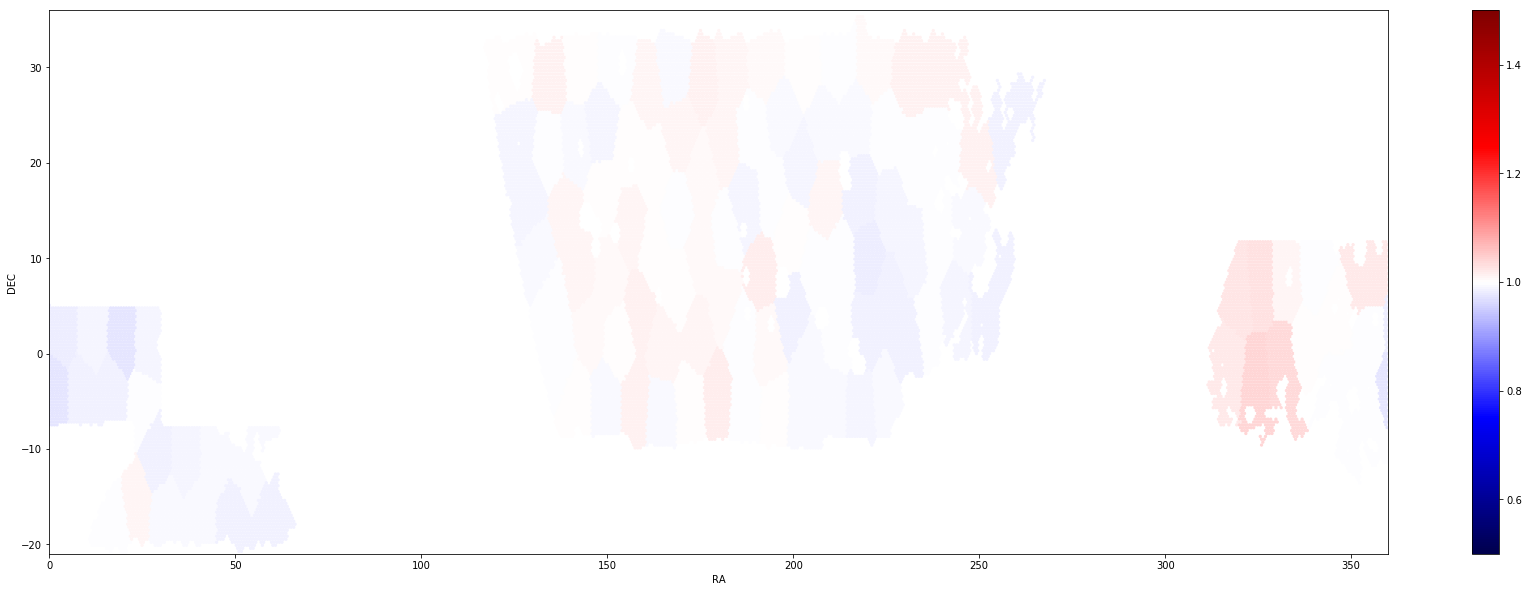

In [9]:
# Final grouping
plt.figure(figsize=(25, 10))
plt.scatter(hp_ra, hp_dec, c=labels, cmap='nipy_spectral', s=5)
plt.axis([0, 360, -21, 36])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

counts_pix = w_counts[labels]
plt.figure(figsize=(30, 10))
plt.scatter(hp_ra, hp_dec, c=counts_pix/np.mean(w_counts),
            cmap='seismic', s=5, vmin=0.5, vmax=1.5)
plt.colorbar()
plt.axis([0, 360, -21, 36])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

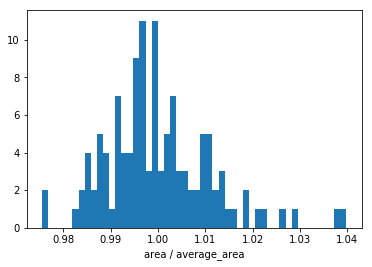

In [10]:
plt.hist(w_counts/np.mean(w_counts), 50)
plt.xlabel('area / average_area')
plt.show()

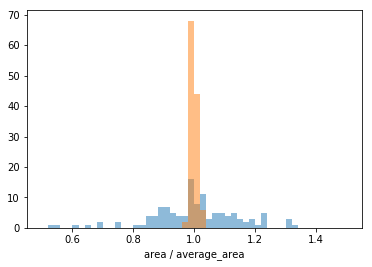

In [12]:
plt.hist(w_counts_init/np.mean(w_counts_init), 50, range=(0.5, 1.5), alpha=0.5)
plt.hist(w_counts/np.mean(w_counts), 50, range=(0.5, 1.5), alpha=0.5)
plt.xlabel('area / average_area')
plt.show()